In [1]:
#############################################################################
####################Import all packages######################################
#############################################################################
import os
import random
import numpy as np
#import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
#import pandas_profiling as pp
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'
# Set working directory
#############################################################################
# Make Jupyter Notebook show ALL output of a cell, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#  READING IN DATA
# CLEANED DATA
control = pd.read_pickle('../../new_data/cleaned//control_clean.pkl')

# FILTERED DATA
#post_filt = pd.read_pickle('../new_data/final_data_USE_THIS_ONE/postflight1_filtered.pkl')
#postflight1_pressure = pd.read_pickle('../new_data/final_data_USE_THIS_ONE/postflight1_pressure_below_1500.pkl')



In [3]:
## Remove all unncessary columns
cols_to_keep = ['timeStamp',
                'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue',
                'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2',
                'Pressure_LateAccess']

#pre_and_flight = pre_and_flight[cols_to_keep]
control = control[cols_to_keep]
#extra = extra[cols_to_keep]

In [5]:
# DFs contain negligible amount of missing values (NAs), just drop them
#import missingno as msno
#msno.matrix(postflight_1)
#pre_and_flight.dropna(inplace=True)
#postflight_1.dropna(inplace=True)
#extra.dropna(inplace=True)

In [6]:
control.reset_index(inplace=True)

In [7]:
# Check the data range of the final timestamps
#pre_and_flight.timeStamp.min()
#pre_and_flight.timeStamp.max()
control.timeStamp.min()
control.timeStamp.max()
#postflight_2.timeStamp.min()
#postflight_2.timeStamp.max()

#extra.timeStamp.min()
#extra.timeStamp.max()


Timestamp('2019-05-21 20:25:41')

Timestamp('2019-06-27 08:30:05')

In [13]:
control.drop('level_0', axis=1, inplace=True)

In [14]:
control.columns

Index(['index', 'timeStamp', 'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue', 'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2', 'Pressure_LateAccess'], dtype='object')

In [ ]:
#date_diff = pd.to_datetime('2019-03-11  13:20:00') - pd.to_datetime('2000-01-01 14:30:02')
#postflight_1.timeStamp = postflight_1.timeStamp + date_diff



In [ ]:
#postflight_2['ph_rolling'] = postflight_2.Exp0_PhValue.rolling(100).mean()
#postflight_2['OxPer_1_rolling'] = postflight_2.Exp1_OxygenpercentO2.rolling(100).mean()
#postflight_2['OxPer_0_rolling'] = postflight_2.Exp0_OxygenpercentO2.rolling(100).mean()


In [26]:
control.shape
control.head(5)

(202441, 8)

,index,timeStamp,Exp0_OxygenTemp,Exp0_OxygenpercentO2,Exp0_PhValue,Exp1_OxygenTemp,Exp1_OxygenpercentO2,Pressure_LateAccess
0,0,2019-05-21 20:25:41,23.298,21.106,0.0,22.594,27.541,1005.7
1,1,2019-05-21 20:25:51,23.288,21.147,0.0,22.574,27.575,1005.6
2,2,2019-05-21 20:26:01,23.283,21.117,0.0,22.550,27.520,1005.7
3,3,2019-05-21 20:26:11,23.272,21.144,0.0,22.527,27.569,1005.3
4,4,2019-05-21 20:26:21,23.267,21.123,0.0,22.514,27.464,1005.5


In [ ]:
# PH Value is completely useless, contains only 2 values.
control.Exp0_PhValue.unique()



In [27]:
cont_filt = control[(control.Exp0_OxygenTemp > 15) & (
                            control.Exp1_OxygenTemp > 15) & (
                            control.Exp1_OxygenpercentO2 > 0) & (
                            control.Exp1_OxygenpercentO2 < 100)& (
                            control.Exp0_OxygenpercentO2 > 0) & (
                            control.Exp0_OxygenpercentO2 < 100) & (
                            control.Exp0_OxygenpercentO2 > 0) & (
                            control.Exp0_OxygenpercentO2 < 100
                            ) & (
                            control.Pressure_LateAccess < 1040
                            ) & (
                            control.Pressure_LateAccess > 900
                            ) ]


In [28]:
cont_filt['ph_rolling'] = cont_filt.Exp0_PhValue.rolling(100).mean()
cont_filt['OxPer_1_rolling'] = cont_filt.Exp1_OxygenpercentO2.rolling(100).mean()
cont_filt['OxPer_0_rolling'] = cont_filt.Exp0_OxygenpercentO2.rolling(100).mean()
cont_filt['PressLA'] = cont_filt.Pressure_LateAccess.rolling(100).mean()

In [56]:
cont_day9 = cont_filt[(cont_filt.timeStamp > pd.to_datetime('2019-06-09 00:00:00')) & (cont_filt.timeStamp < pd.to_datetime('2019-06-10 00:00:00'))]

(array([737200., 737204., 737208., 737211., 737215., 737219., 737223.,
        737227., 737231., 737235., 737239.]),
 <a list of 11 Text xticklabel objects>)

Text(0, 0.5, 'Water temperature \n [C°]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Water temperature [Exp0_Ground control]')

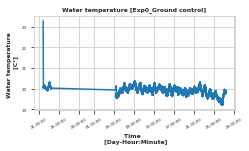

In [57]:
import numpy as np
import matplotlib as mpl
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.95, top=.90)

plt.plot( #data= post_filt   ,
                 
    cont_filt.timeStamp,
    #                y =
    cont_filt.Exp0_OxygenTemp
            )
         

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')

plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Water temperature \n [C°]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Water temperature [Exp0_Ground control]', fontsize='6', fontweight='bold')

fig.set_size_inches(width, height)
fig.savefig('Water_temperature_Exp0_Ground_control.png', dpi=500)


(array([737200., 737204., 737208., 737211., 737215., 737219., 737223.,
        737227., 737231., 737235., 737239.]),
 <a list of 11 Text xticklabel objects>)

Text(0, 0.5, 'Water temperature \n [C°]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Water temperature [Exp1_Ground control]')

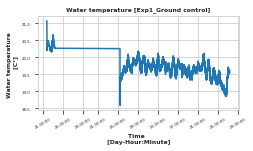

In [64]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.95, top=.90)

plt.plot(            
            cont_filt.timeStamp,
             cont_filt.Exp1_OxygenTemp.rolling(100).mean()
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Water temperature \n [C°]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Water temperature [Exp1_Ground control]', fontsize='6', fontweight='bold')

#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)

fig.savefig('Water_temperature_Exp1_Ground_control.png', dpi=1000)
#plt.show()

(array([737200., 737204., 737208., 737211., 737215., 737219., 737223.,
        737227., 737231., 737235., 737239.]),
 <a list of 11 Text xticklabel objects>)

Text(0, 0.5, 'Oxygen content \n [%]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Oxygen content [Exp1_Ground control]')

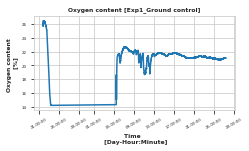

In [59]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)



# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.95, top=.90)

plt.plot(          
           cont_filt.timeStamp,
           cont_filt.OxPer_1_rolling
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Oxygen content \n [%]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Oxygen content [Exp1_Ground control]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('Oxygen_content_Exp1_Ground_control.png', dpi=1000)


(array([737200., 737204., 737208., 737211., 737215., 737219., 737223.,
        737227., 737231., 737235., 737239.]),
 <a list of 11 Text xticklabel objects>)

Text(0, 0.5, 'Oxygen content \n [%]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Oxygen content [Exp0_Ground control]')

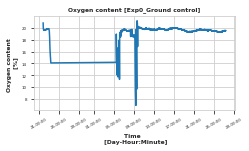

In [60]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.95, top=.90)

plt.plot(
    
      cont_filt.timeStamp,
      cont_filt.OxPer_0_rolling
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Oxygen content \n [%]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Oxygen content [Exp0_Ground control]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('Oxygen_content_Exp0_Ground_control.png', dpi=1000)


(array([737200., 737204., 737208., 737211., 737215., 737219., 737223.,
        737227., 737231., 737235., 737239.]),
 <a list of 11 Text xticklabel objects>)

Text(0, 0.5, 'Ambient Pressure \n [hPa]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Ambient Pressure [Ground control]')

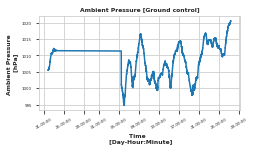

In [61]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.95, top=.90)

plt.plot(
          
           cont_filt.timeStamp,
           cont_filt.PressLA)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Ambient Pressure \n [hPa]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Ambient Pressure [Ground control]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('Ambient_Pressure_Ground_control.png', dpi=1000)




(array([737200., 737204., 737208., 737211., 737215., 737219., 737223.,
        737227., 737231., 737235., 737239.]),
 <a list of 11 Text xticklabel objects>)

Text(0, 0.5, 'pH Value')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'pH Value [Exp0_Ground control]')

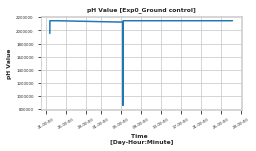

In [62]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.95, top=.90)

plt.plot(           
           cont_filt.timeStamp,
           cont_filt.ph_rolling)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("pH Value", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('pH Value [Exp0_Ground control]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('Exp0_PhValue_Ground_control.png', dpi=1000)




In [66]:
# Saving to disk
cont_filt.to_pickle('../../new_data/final_data_USE_THIS_ONE/control_filtered.pkl')
cont_filt.to_csv('../../new_data/final_data_USE_THIS_ONE/control_filtered.csv')


In [67]:
cont_filt.dtypes

index                            int64
timeStamp               datetime64[ns]
Exp0_OxygenTemp                float64
Exp0_OxygenpercentO2           float64
Exp0_PhValue                   float64
Exp1_OxygenTemp                float64
Exp1_OxygenpercentO2           float64
Pressure_LateAccess            float64
ph_rolling                     float64
OxPer_1_rolling                float64
OxPer_0_rolling                float64
PressLA                        float64
dtype: object